In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

# #1. Analisa Descriptive Statistic

### 1. Berapa rata rata umur pada data tersebut?

In [4]:
round(df.age.mean())

39

### 2. Berapa rata rata nilai BMI dari yang merokok?

In [5]:
df[df.smoker == "yes"]["bmi"].mean()

30.70844890510949

### 3. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [6]:
perokok = df[df.smoker == "yes"]
perokok_wanita = perokok[perokok.sex == "female"]
perokok_pria = perokok[perokok.sex == "male"]

if round(perokok_wanita.age.mean()) == round(perokok_pria.age.mean()):
    print("rata-rata umur perempuan dan laki-laki yang merokok sama")
else:
    print("rata-rata umur perempuan dan laki-laki yang merokok tidak sama")

rata-rata umur perempuan dan laki-laki yang merokok tidak sama


### 4. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [7]:
tagihan_perokok = df[df.smoker == "yes"]["charges"].mean()
tagihan_non_perokok = df[df.smoker == "no"]["charges"].mean()

if tagihan_perokok > tagihan_non_perokok:
    print("Tagihan kesehatan customer perokok lebih besar dari tagihan kesehatan customer non perokok")
else:
    print("Tagihan kesehatan customer perokok sama atau lebih rendah dari tagihan kesehatan customer non perokok")

Tagihan kesehatan customer perokok lebih besar dari tagihan kesehatan customer non perokok


### 5. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [8]:
bmi_perokok = df[df.smoker == "yes"]["bmi"].mean()
bmi_non_perokok = df[df.smoker == "no"]["bmi"].mean()

if bmi_perokok > bmi_non_perokok:
    print("BMI customer perokok lebih besar dari BMI customer non perokok")
else:
    print("BMI customer perokok sama atau lebih rendah dari BMI customer non perokok")

BMI customer perokok lebih besar dari BMI customer non perokok


# #2. Analisa Variabel Kategorik (PMF)

### 1. Gender mana yang memiliki tagihan paling tinggi?

In [9]:
df.iloc[df['charges'].idxmax()]["sex"]

'female'

namun apabila dilihat dari rata-rata tagihannya, maka di dapat

In [10]:
male_charges = df[df.sex == "male"]["charges"].mean()
female_charges = df[df.sex == "female"]["charges"].mean()

if male_charges > female_charges:
    print("laki-laki memiliki tagihan rata-rata lebih tinggi dibandingkan dengan tagihan rata-rata perempuan")
else:
    print("perempuan memiliki tagihan rata-rata lebih tinggi atau sama dengan tagihan rata-rata laki-laki")

laki-laki memiliki tagihan rata-rata lebih tinggi dibandingkan dengan tagihan rata-rata perempuan


### 2. Apakah setiap region memiliki proporsi data banyak orang yang sama?

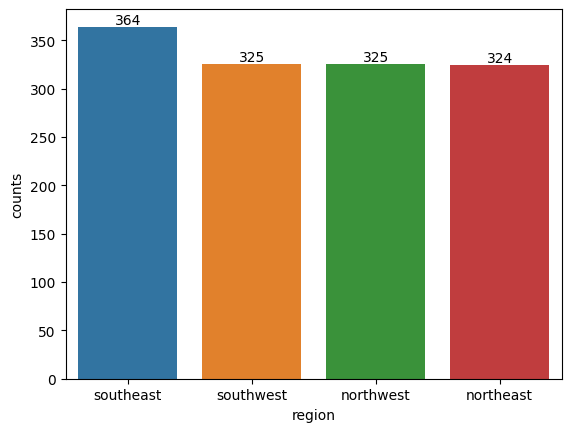

In [11]:
df_regions = df.region.value_counts().rename_axis(
    'region').reset_index(name='counts')

ax = sns.barplot(data=df_regions, x="region", y="counts")

for i in ax.containers:
    ax.bar_label(i,)

Terlihat dari grafik diatas bahwa setiap region memiliki proporsi data banyak orang yang tidak sama, walaupun ada 2 diantara 4 region tersebut yang nilainya sama.

### 3. Mana yang lebih tinggi proporsi perokok atau non perokok?

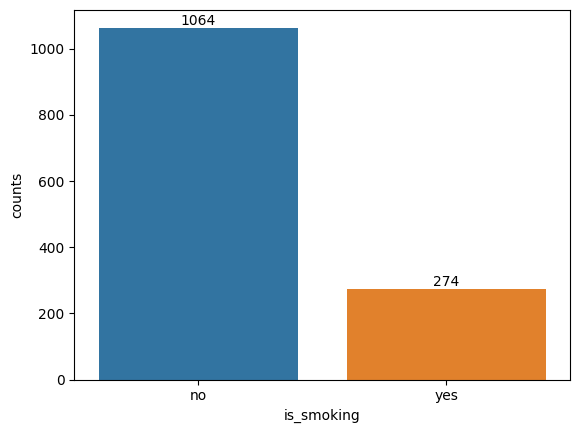

In [12]:
df_smoker = df.smoker.value_counts().rename_axis(
    'is_smoking').reset_index(name='counts')

ax = sns.barplot(data=df_smoker, x="is_smoking", y="counts")

for i in ax.containers:
    ax.bar_label(i,)

Dapat kita simpulkan bahwa proporsi data non perokok lebih besar dibandingkan perokok.

### 4. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [13]:
smoker = df[df.smoker == "yes"]
smoker_wanita = smoker[smoker.sex == "female"]
p_wanita_smoker = smoker_wanita.shape[0] / smoker.shape[0]
print(f'{round(p_wanita_smoker*100, 2)}%')

41.97%


### 5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [14]:
smoker = df[df.smoker == "yes"]
smoker_pria = smoker[smoker.sex == "male"]
p_pria_smoker = smoker_pria.shape[0] / smoker.shape[0]
print(f'{round(p_pria_smoker*100, 2)}%')

58.03%


# #3. Analisa Variabel Kontinu

### 1. Mana yang lebih mungkin terjadi seseorang dengan BMI diatas 25  atau dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

/var/folders/b2/3mjhgr1d21d6588bs7_1zjrr0000gn/T/ipykernel_66203/3072612396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charge_above_16k["is_bmi_above_25"] = charge_above_16k.bmi > 25


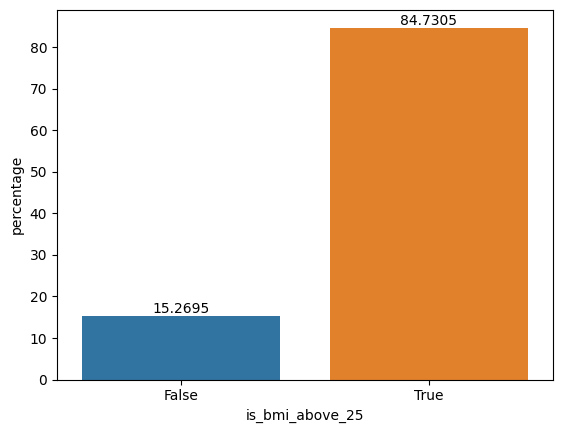

In [15]:
charge_above_16k = df[df.charges > 16700]
charge_above_16k["is_bmi_above_25"] = charge_above_16k.bmi > 25

df_temp = charge_above_16k["is_bmi_above_25"].value_counts().rename_axis(
    'is_bmi_above_25').reset_index(name='counts')

df_temp["percentage"] = df_temp["counts"] / df_temp.counts.sum() * 100

ax = sns.barplot(data=df_temp, x="is_bmi_above_25", y="percentage")

for i in ax.containers:
    ax.bar_label(i,)

Sebesar 84.73% lebih mungkin terjadi seseorang dengan BMI diatas 25 memiliki tagihan kesehatan diatas 16.7k.

### 2. Mana yang lebih mungkin terjadi seseorang perokok atau non perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k

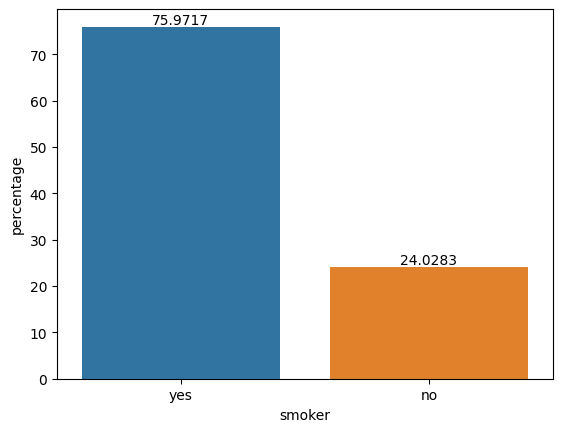

In [16]:
charge_above_16k = df[df.charges > 16700]
bmi_above_25 = charge_above_16k[charge_above_16k.bmi > 25]

df_temp = bmi_above_25["smoker"].value_counts().rename_axis(
    'smoker').reset_index(name='counts')

df_temp["percentage"] = df_temp["counts"] / df_temp.counts.sum() * 100

ax = sns.barplot(data=df_temp, x="smoker", y="percentage")

for i in ax.containers:
    ax.bar_label(i,)

Sebesar 75.97% lebih mungkin terjadi seseorang dengan BMI diatas 25 dan seorang perokok memiliki tagihan kesehatan diatas 16.7k.

# #4. Analisa Korelasi Variabel

Kita dapat mencari keterhubungan (korelasi) antara tagihan kesehatan dengan kondisi-kondisi lainnya.

In [17]:
df["is_smoker"] = df.smoker == "yes"

<AxesSubplot:>

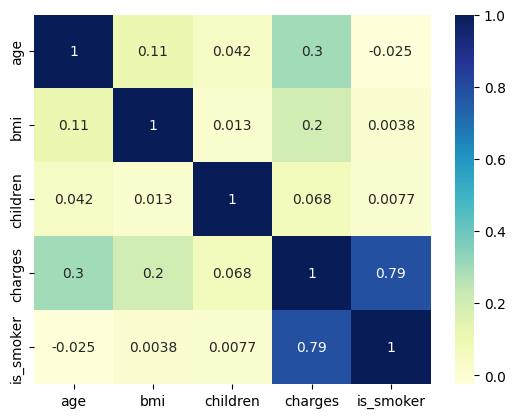

In [18]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Terlihat bahwa status merokok seseorang memiliki korelasi yang cukup besar terhadap besaran tagihan kesehatannya.

Untuk melihat lebih jauh, dapat kita plot kan tersendiri bagaimana pengaruh status merokok terhadap tagihan kesehatan, dengan nilai bmi sebagai acuan.

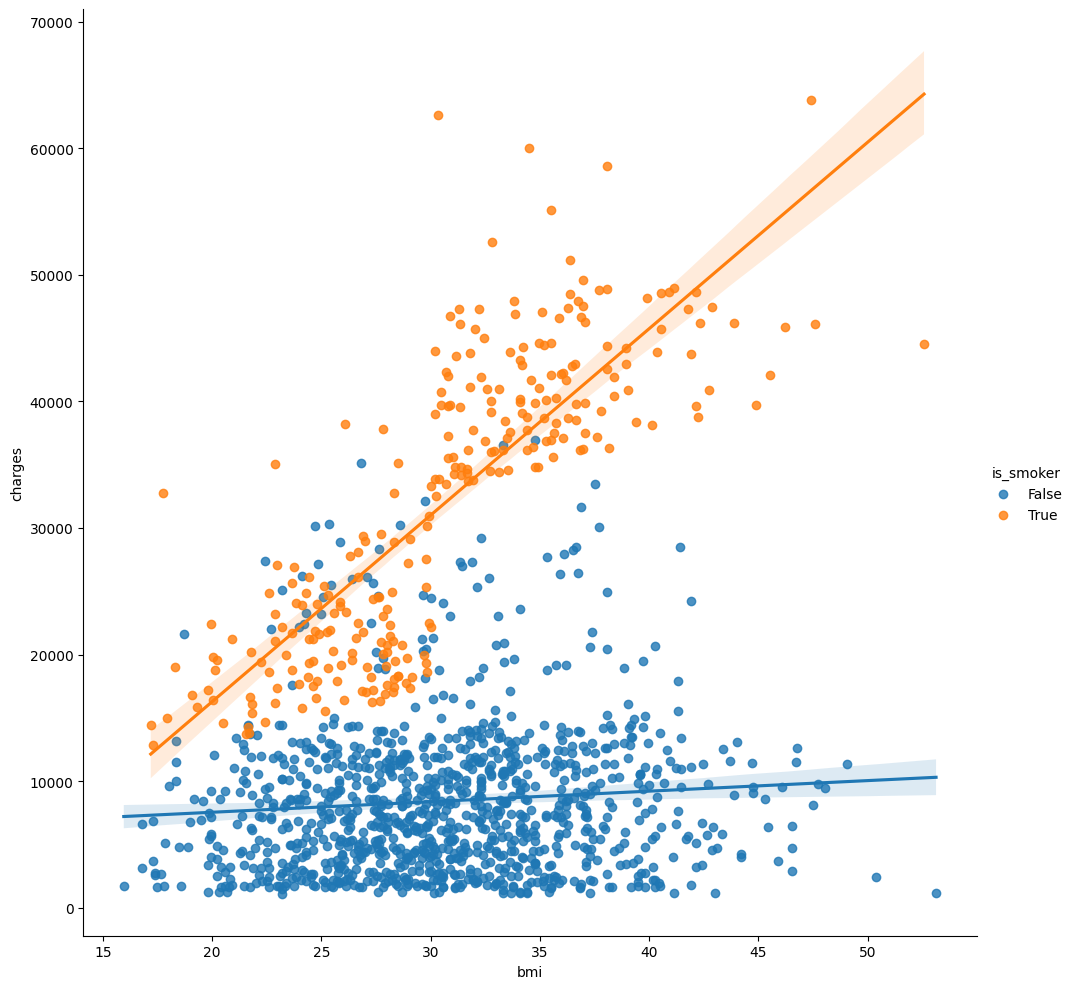

In [19]:
sns.lmplot(x="bmi",
           y="charges",
           hue="is_smoker",
           data=df,
           height=10)

# #5. Pengujian Hipotesis

In [20]:
def decision(_p, alpha=0.05):
    if _p > alpha:
        print("Gagal tolak H0")
    else:
        print("Tolak H0")

### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

H0: Tagihan kesehatan perokok sama dengan tagihan kesehatan non perokok<br>
H1: Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [21]:
smoker_charges = df[df.smoker == "yes"]["charges"]
non_smoker_charges = df[df.smoker == "no"]["charges"]

st, p = ttest_ind(smoker_charges, non_smoker_charges,
                  equal_var=False, alternative='greater')

decision(p)

Tolak H0


Sehingga dapat kita katakan bahwa tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.

### 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

H0: Tagihan kesehatan dengan BMI diatas 25 sama dengan tagihan kesehatan dengan BMI dibawah 25<br>
H1: Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [22]:
bmi_gt_25_charges = df[df.bmi > 25]["charges"]
bmi_lt_25_charges = df[df.bmi < 25]["charges"]

st, p = ttest_ind(bmi_gt_25_charges, bmi_lt_25_charges,
                  equal_var=False, alternative='greater')

decision(p)

Tolak H0


Sehingga dapat kita katakan bahwa tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

### 3. Tagihan kesehatan laki-laki lebih besar dari perempuan

H0: Tagihan kesehatan laki-laki sama dengan perempuan<br>
H1: Tagihan kesehatan laki-laki lebih besar dari perempuan

In [23]:
male_charges = df[df.sex == "male"]["charges"]
female_charges = df[df.sex == "female"]["charges"]

st, p = ttest_ind(male_charges, female_charges,
                  equal_var=False, alternative='greater')

decision(p)

Tolak H0


Sehingga dapat kita katakan bahwa tagihan kesehatan laki-laki lebih besar dari perempuan.